In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#importing data and dropping column
data = Path("./Data/myopia.csv")
myopia_df = pd.read_csv(data)
myopia_df1 = myopia_df.drop("MYOPIC", axis=1)
myopia_df1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
#quick Scaling of Data
myopia_scaled = StandardScaler().fit_transform(myopia_df1)

In [4]:
#applying PCA Dimension Reduction to .9
myopia_pca = PCA(n_components=.9).fit_transform(myopia_scaled)
pd.DataFrame(data=myopia_pca).head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


<function matplotlib.pyplot.show(close=None, block=None)>

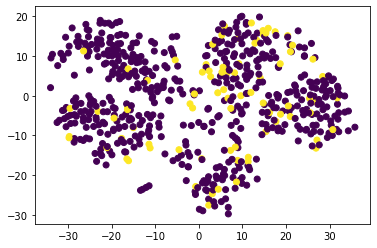

In [5]:
#further reduction and visualization with t-SNE
myopia_tsne = TSNE(learning_rate=350).fit_transform(myopia_pca)
labels = myopia_df["MYOPIC"]
plt.scatter(myopia_tsne[:,0], myopia_tsne[:,1], c=labels)
plt.show

In [6]:
#Evaluation of the TSNA plot is not showing any distinct clusters. So as of right now can not distinguish any 
#distinct groups that would allow you to predict if someone is myopic.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


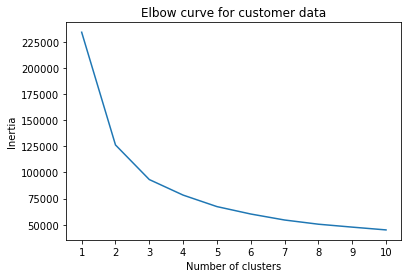

In [7]:
#Calculating the inertia to evaluate the best k to use and plotting

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

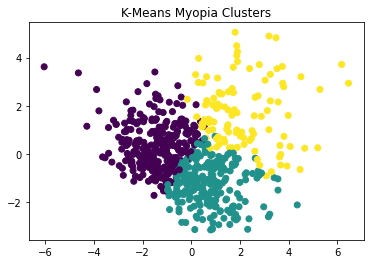

In [20]:
#Setting up and plotting the K-Means model
myopia_k = pd.DataFrame(data=myopia_pca)
kmodel = KMeans(n_clusters=3, random_state=0)
kmodel.fit(myopia_k)
predictions = kmodel.predict(myopia_k)
myopia_k["class"] = kmodel.labels_

plt.scatter(myopia_k[0], myopia_k[1], c=myopia_k['class'])
plt.title('K-Means Myopia Clusters')
plt.show()

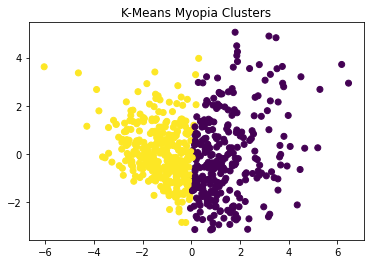

In [21]:
myopia_k = pd.DataFrame(data=myopia_pca)
kmodel = KMeans(n_clusters=2, random_state=0)
kmodel.fit(myopia_k)
predictions = kmodel.predict(myopia_k)
myopia_k["class"] = kmodel.labels_

plt.scatter(myopia_k[0], myopia_k[1], c=myopia_k['class'])
plt.title('K-Means Myopia Clusters')
plt.show()

In [ ]:
# While the tSNE data plot showed little results, we were definitely able to to create some clusters using K-Means. It 
# will be a judgement call on whether to use 2 or 3 clusters. The elbow curve was still at a descent decline before 3, 
# but it was a really steep decline getting to 2. I decided to go ahead and plot both and they both showed clustering.
# Using 3 clusters feel you might get smaller groups to analyze, but going with 2 clusters and the fact a patient is
# either myopic or not would give you more definitive data.